# Spreading Out

## Simplest Prabolic PDE - the 1D Diffusion Equation
$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

## Heat Conduction
- a diffusive process
$$
\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\end{equation}
$$

- $\alpha$ is the thermal diffusivity, a property of the material, and $T$ is the temperature
- stability constraint:

$$
\begin{equation}
\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
\end{equation}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as py
% matplotlib inline

# Font family and size to use for Matplotlib figures.
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [2]:
# Parameters
L = 1.0  # length of the rod
nx = 51  # number of locations on the rod
dx = L / (nx - 1)  # distance between two consecutive locations
alpha = 1.22e-3  #  thermal diffusivity of the rod

# Locations along the rod.
x = np.linspace(0.0, L, num = nx)

# Initial temperature along the rod.
T0 = np.zeros(nx)
T0[0] = 100.0

####  forward-time, centered-space discretization
$$
\begin{equation}
\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=\alpha\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\Delta x^2}
\end{equation}
$$

#### temperature at the next time step, $T^{n+1}_i$
$$
\begin{equation}
T_{i}^{n+1}=T_{i}^{n}+\frac{\alpha\Delta t}{\Delta x^2}(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n})
\end{equation}
$$

In [3]:
'''
    Computes and returns the temperature along the road after
        a provuded number of time steps, given the initia
        temperature and thermal diffusivity. 
    The diffusion equation is integrated using forward differencing
        in time and central differencing in space.
    T0 : np.ndarray, initial temperature along the rod
    nt : integer, number of time steps to compute
    dt : float, time-step sie to integrate
    dx : float, distance between two consecutive locations
    alpha : float, thermal diffusivity of the rd
    
    Returns:
    T : np.ndarray, the temperature along the road
'''

def ftcs(t0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
    return T

In [4]:
# Set the time-step size based on CFL limit
nt = 100  # number of time steps to compute
sigma = 0.5
dt = sigma * dx**2 / alpha  # time-step size

# Temperature along the road
T = ftcs(T0, nt, dt, dx, alpha)

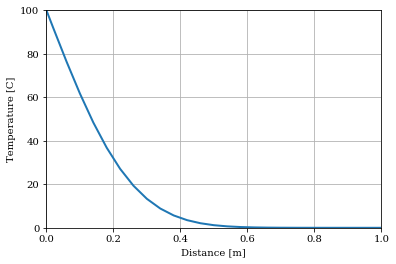

In [5]:
# Plot of the tmeperature along the rod
py.figure(figsize=(6.0, 4.0))
py.xlabel('Distance [m]')
py.ylabel('Temperature [C]')
py.grid()
py.plot(x, T, color = 'C0', linestyle = '-', linewidth = 2)
py.xlim(0.0, L)
py.ylim(0.0, 100.0);

## Boundary Conditions

### Dirichlet Boundary

In [6]:
# Increase the number of time steps
nt = 1000

# Compute the temperature along the rod
T = ftcs(T0, nt, dt, dx, alpha)

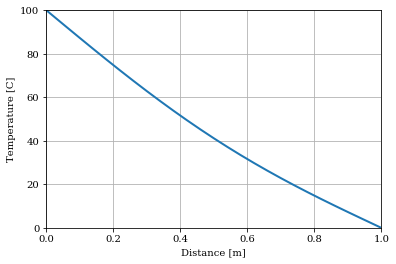

In [7]:
# Plot of the temperature along the rod
py.figure(figsize=(6.0, 4.0))
py.xlabel('Distance [m]')
py.ylabel('Temperature [C]')
py.grid()
py.plot(x, T, color = 'C0', linestyle = '-', linewidth = 2)
py.xlim(0.0, L)
py.ylim(0.0, 100.0);

### Neumann Boundary
- specifies the value of the derivative of the solution at the border instead of specifying the value of the solution at the border

$$
\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x = 1} = q(t)
\end{equation}
$$

At time step $n$, for $N$ points...

$$
\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x=1} \approx \frac{T^n_N - T^n_{N-1}}{\Delta x} = q(t)
\end{equation}
$$

In the context of heat conduction, the space derivative of temperature is the heat flux density $q$, the amount of heat per unit time, per unit area.

For example, if the rod at $x=1$ has some insulating material, no heat is going to be able to get out through that end, and the Neumann boundary condition is:

$$
\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x=1} = 0
\end{equation}
$$

Let's revisit the heated-rod problem.  This time, the temperature at $x = 0$ will remain fixed at $T = 100{\rm C}$—that's the Dirichlet condition— and a Neumann BC applies at $x = 1$.

In [8]:
'''
    Computes the temperature along the rod with the given
        number of time steps, initial temperature, and the
        thermal diffusivity.
    The diffusion equation is integrated using forward differencing
        in time and central differencing in space.
    The function uses a Dirichlet condition on the left side
         of the rod and a Neumann condition (zero-gradient) on
         the right side.
    T0 : np.ndarray, initial temperature along the rod
    nt : integer, time-step size to compute
    dt : float, time-step size to integrate
    dx : float, distance between two consecutive location
    alpha : float, thermal diffusivity of the rod
    
    Returns:
    T : np.ndarray, temperature along the rod as a 1D array of floats
'''

def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
        # Applying Neumann condition at the last location
        T [-1] = T[-2]
    return T

In [9]:
nt = 1000  # number of time-steps to compute

# Temperature along the road
T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)

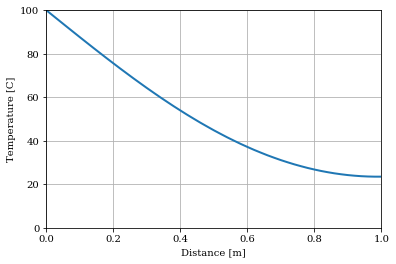

In [10]:
# Plot of the temperature along the rod
py.figure(figsize = (6.0, 4.0))
py.xlabel('Distance [m]')
py.ylabel('Temperature [C]')
py.grid()
py.plot(x, T, color = 'C0', linestyle = '-', linewidth = 2)
py.xlim(0.0, L)
py.ylim(0.0, 100.0);

If you increase the number of time steps `nt` further, you will see that the outflow temperature at $x = 1$ continues to increase.

### Explicit Schemes and BCs
- explicit schemes, the updated solution at $t^{n+1}$ was computed using only known information at time $t^n$
- has limitations, particularly with the small sizes of time step necessary to obtain stability
- to calculate $T_i^{n+1}$ you use the information from the grid points $i-1, i, i+1$ at the previous time step
- thus, any change in boundary condition will feed into the solution only at the next time step, not immediatelyw
- this contradicts the physics of the problem,  as any change on the boundary should be felt right away under the diffusion equation
- to include boundary effects on the same time level, we can use an _implicit_ update